# drawing-hares
notebook for prior-informed hare drawing\
*note: this will hopefully be the only notebook in the repo that has external dependence (the grid) - drawn hares will be saved so this should only need running once*

In [1]:
#stock imports
import numpy as np
import pandas as pd
import json
import scipy
##plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import corner

from scripts import prior_funcs, utils

#plt.style.use('dark_background')
plt.style.use('default')

## define priors

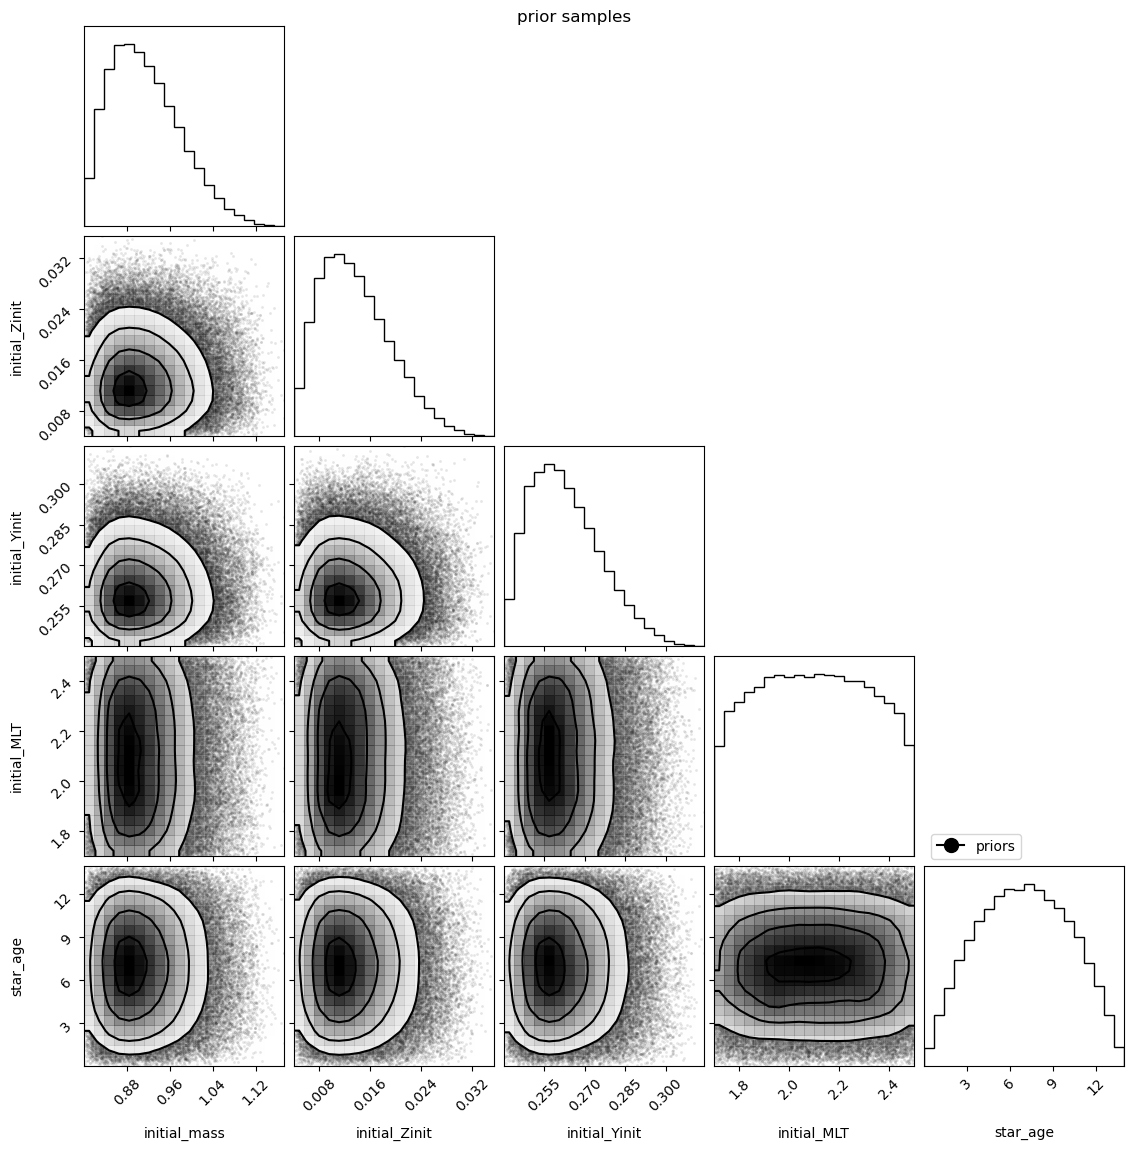

In [2]:
labels = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']

mass_prior = prior_funcs.custom_beta_prior(0.8, 1.2, a=2, b=5)

Zinit_prior = prior_funcs.custom_beta_prior(0.004, 0.038, a=2, b=5)

Yinit_prior = prior_funcs.custom_beta_prior(0.24, 0.32, a=2, b=5)

MLT_prior = prior_funcs.custom_beta_prior(1.7, 2.5, a=1.2, b=1.2)

age_prior = prior_funcs.custom_beta_prior(0.03, 14, a=2, b=2)


priors = [mass_prior, Zinit_prior, Yinit_prior, MLT_prior, age_prior]

size = 100000
plot_prior_samples = np.array([prior.rvs(size=size) for prior in priors])
legend_labels = []
corner_color = 'black'
corner.corner(plot_prior_samples.T, labels = labels, color=corner_color, hist_kwargs={'density':True}, smooth=True);
legend_labels = legend_labels + [Line2D([0], [0], marker='o', color =corner_color, markerfacecolor = corner_color, markersize=10, label='priors')]
plt.suptitle('prior samples')
plt.legend(handles=legend_labels, bbox_to_anchor=(0., 1.0, 1., .0), loc=0)
plt.show()

## import grid
here's where the external grid dependency starts (and hopefully ends)

In [3]:
df_full = pd.concat([pd.read_hdf("/home/oxs235/datastorage/repos_data/ojscutt/mesa_ajl/data/grid2p5a/grid.h5", key=f"m{0.8 + i*0.02:.2f}") for i in range(21)], ignore_index=True)
df = df_full[df_full["log_g"] >= 3.6]
df = df[df["star_age"] <= 14]
df = df[df["frac_age"] >= 0.015]

inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
outputs = ['radius', 'luminosity', 'star_feh'] + [f'nu_0_{i}' for i in range(6,41)] + ['nu_max']

df = df.loc[(df[[f'nu_0_{i}' for i in range(6,41)]] != 0).all(axis=1)]

cols = inputs + outputs

df = df[cols]

df.dropna(inplace=True)

df['calc_effective_T'] = utils.calc_Teff(df['luminosity'], df['radius'])

In [4]:
df.describe()

,initial_mass,initial_Zinit,initial_Yinit,initial_MLT,star_age,radius,luminosity,star_feh,nu_0_6,nu_0_7,...,nu_0_33,nu_0_34,nu_0_35,nu_0_36,nu_0_37,nu_0_38,nu_0_39,nu_0_40,nu_max,calc_effective_T
count,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,...,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06,2.448681e+06
mean,1.021885e+00,1.440698e-02,2.814693e-01,2.117984e+00,5.000177e+00,1.312728e+00,2.116482e+00,-1.127145e-01,7.726572e+02,8.860424e+02,...,3.696535e+03,3.802234e+03,3.907317e+03,4.011806e+03,4.115788e+03,4.219425e+03,4.322952e+03,4.426627e+03,2.370506e+03,5.866797e+03
std,1.175610e-01,9.677123e-03,2.805593e-02,2.879175e-01,3.405371e+00,4.813547e-01,1.572419e+00,3.499532e-01,2.959808e+02,3.426600e+02,...,1.451591e+03,1.494205e+03,1.536228e+03,1.577500e+03,1.617908e+03,1.657417e+03,1.696104e+03,1.734156e+03,1.156533e+03,5.670330e+02
min,8.000000e-01,3.869061e-03,2.400000e-01,1.700000e+00,2.966411e-02,6.990236e-01,1.321735e-01,-1.077903e+00,2.103102e+02,2.385545e+02,...,1.002125e+03,1.032723e+03,1.063221e+03,1.093511e+03,1.123625e+03,1.153506e+03,1.183191e+03,1.212653e+03,4.317504e+02,4.096930e+03
25%,9.200000e-01,6.471429e-03,2.600000e-01,1.900000e+00,2.309880e+00,9.719693e-01,9.371542e-01,-4.000000e-01,5.476978e+02,6.234189e+02,...,2.578850e+03,2.649156e+03,2.720741e+03,2.793748e+03,2.868279e+03,2.944027e+03,3.020312e+03,3.097018e+03,1.444480e+03,5.491841e+03
50%,1.040000e+00,1.077191e-02,2.800000e-01,2.100000e+00,4.275231e+00,1.160016e+00,1.698469e+00,-1.000000e-01,7.832912e+02,8.972267e+02,...,3.760636e+03,3.866328e+03,3.970106e+03,4.072429e+03,4.174203e+03,4.276548e+03,4.380549e+03,4.486487e+03,2.352665e+03,5.859776e+03
75%,1.120000e+00,2.007835e-02,3.000000e-01,2.300000e+00,7.159688e+00,1.498369e+00,2.883064e+00,1.837200e-01,9.935144e+02,1.142381e+03,...,4.784137e+03,4.922458e+03,5.059497e+03,5.194580e+03,5.327444e+03,5.458355e+03,5.587658e+03,5.716681e+03,3.185873e+03,6.219454e+03
max,1.200000e+00,3.897971e-02,3.200000e-01,2.500000e+00,1.399997e+01,2.873431e+00,1.163902e+01,5.094573e-01,1.480807e+03,1.705344e+03,...,7.145063e+03,7.354126e+03,7.562945e+03,7.771521e+03,7.979340e+03,8.185512e+03,8.382538e+03,8.584072e+03,5.856447e+03,7.993034e+03


## sample from prior and find nearest neighbour (hares)

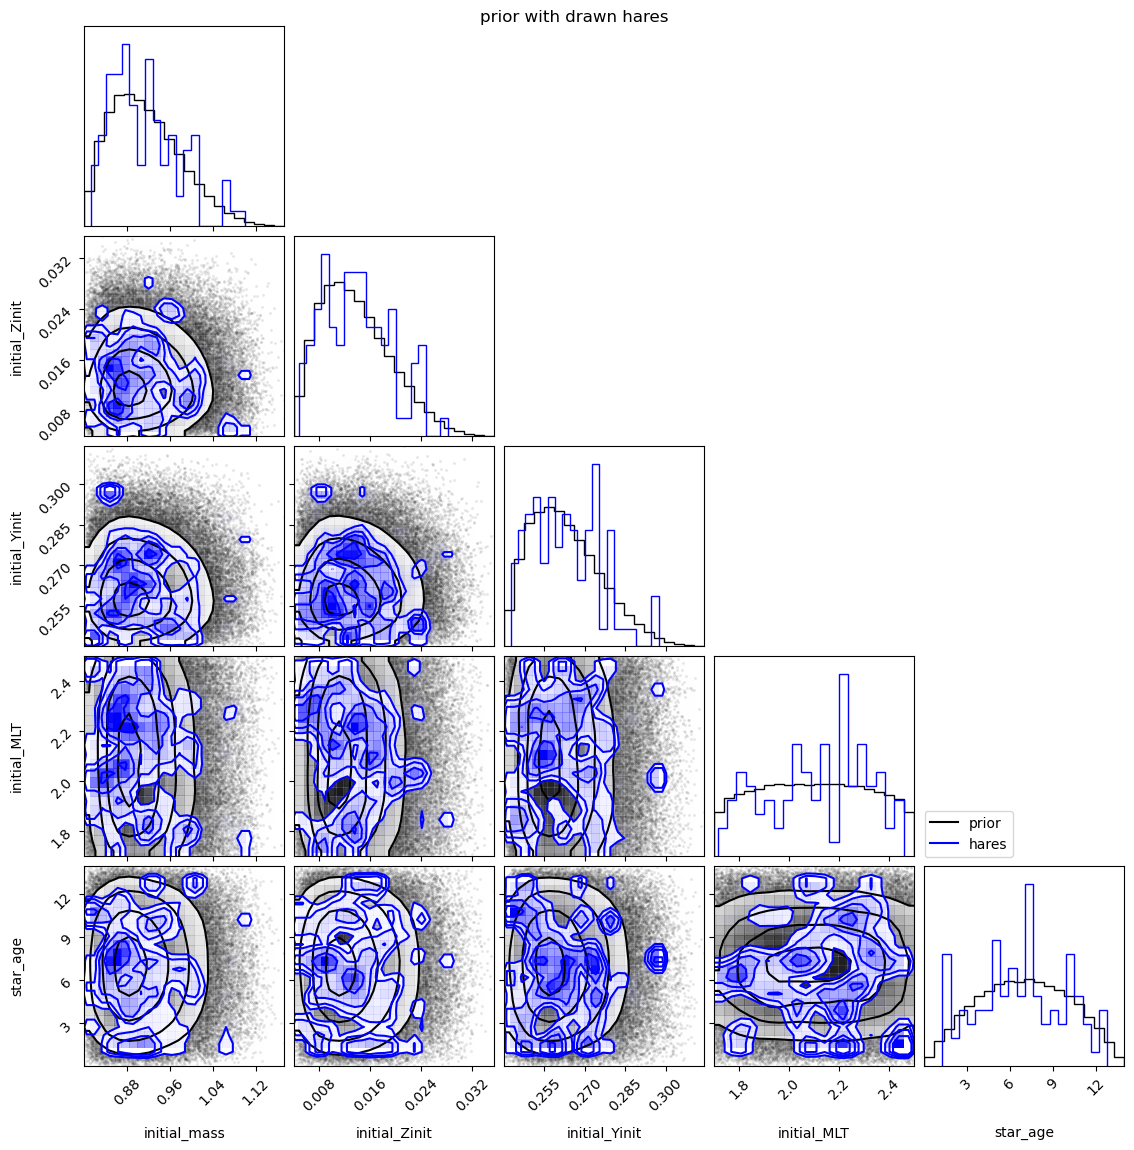

In [5]:
hares_to_sample = 100
prior_samples = np.array([prior.rvs(size=hares_to_sample) for prior in priors])

def corner_legend(color, label):
    return [Line2D([0], [0], marker='', color =color, markerfacecolor = color, markersize=10, label=label)]

#plotting samples over priors:
legend_labels = []

priors_color = 'black'
figure = corner.corner(plot_prior_samples.T, labels = labels,color=priors_color, hist_kwargs={'density':True}, smooth=True);
legend_labels += corner_legend(priors_color, 'prior')

hares_color = 'blue'
corner.corner(prior_samples.T, labels = labels, color=hares_color,hist_kwargs={'density':True}, fig=figure, smooth=True);
legend_labels += corner_legend(hares_color, 'hares')

plt.legend(handles=legend_labels, bbox_to_anchor=(0, 1, .48, 0.31))
plt.suptitle('prior with drawn hares')
plt.show()

In [6]:
from scipy.spatial.distance import cdist
import os

def closest_grid_point(point, grid_df, columns=['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']):
    return grid_df.iloc[[cdist([point], grid_df[columns].values).argmin()]]

def nu_max_n(hare_sample):
    nu_max = hare_sample['nu_max']
    nu_max_header = np.abs(hare_sample[[f'nu_0_{i}' for i in range(6,41)]]-nu_max.values[0]).min().idxmin()
    hare_sample = hare_sample.drop('nu_max', axis=1).copy()
    hare_sample.loc[:,'nu_max_n'] = nu_max_header.replace('nu_0_', '')
    return hare_sample

for hare_idx in range(hares_to_sample):
    hare_sample = closest_grid_point(prior_samples[:,hare_idx], df)
    hare_sample = nu_max_n(hare_sample)
    path = f'surf_form/hare{hare_idx}'
    if not os.path.exists(path):
      os.mkdir(path)
      print(f"{path} created!")
    else:
      print(f"{path} already exists", end='\r')
    hare_sample.to_json(path+f'/hare{hare_idx}.json')

surf_form/hare0 created!
surf_form/hare1 created!
surf_form/hare2 created!
surf_form/hare3 created!
surf_form/hare4 created!
surf_form/hare5 created!
surf_form/hare6 created!
surf_form/hare7 created!
surf_form/hare8 created!
surf_form/hare9 created!
surf_form/hare10 created!
surf_form/hare11 created!
surf_form/hare12 created!
surf_form/hare13 created!
surf_form/hare14 created!
surf_form/hare15 created!
surf_form/hare16 created!
surf_form/hare17 created!
surf_form/hare18 created!
surf_form/hare19 created!
surf_form/hare20 created!
surf_form/hare21 created!
surf_form/hare22 created!
surf_form/hare23 created!
surf_form/hare24 created!
surf_form/hare25 created!
surf_form/hare26 created!
surf_form/hare27 created!
surf_form/hare28 created!
surf_form/hare29 created!
surf_form/hare30 created!
surf_form/hare31 created!
surf_form/hare32 created!
surf_form/hare33 created!
surf_form/hare34 created!
surf_form/hare35 created!
surf_form/hare36 created!
surf_form/hare37 created!
surf_form/hare38 creat

In [ ]:
## add emus here if needed